## Overview

Since the moment covid-19 began to spread globally, countries have implemented several measeures in response. One of the aims of these measures is to restrict mobility to halt virus spread. This project investigates how mobility far did mobility go down for each population **from the end of Febreuary to May:


## Problem Statement

The problem posed by this project asks the following questions:

***When was the timeline for each country when mobility reached a minumum?**

***Which countries that had the greatest mobility decrease? Which of them had the least? Which reacted the earliest? And which reacted the latest?**

***What are the patterns for each continent? And the continent's average minimum**

***How does the change in mobility correlate with the number of coronavirus cases in the country?**


## Metric

**the metric for measuring the results obtained from the analysis of the data is the change in baseline for each day of the week, which is inherent in the structure of the dataset. Judgements will be made based on how different from baseline did every country have on each day.**

**Specifically, we will look at the min value, which is the greatest negative change from baseline. This approach has its problems because it looks at a single date. Because something else could explain the change from baseline other than the pandemic this approach is not very accurate.**

**Thus, another approach is employed as an improvement. a 7-day average is taken and then min week is determined. (min week in this case is the week with least mobility)**

**There's one location type where max is computed instead of min, which is residential, since it indicates less mobility if people spend more time there.**

**According to Google, "Each day’s baseline is the median day-value from the 5-week period in January."**

for more information visit this [link](https://support.google.com/covid19-mobility/checklist/9834261)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# read global mobility dataset
mobil_df= pd.read_csv('Global_Mobility_Report.csv', dtype=str) # use str dtype to avoid warning messeage

'''This project primarly focuses on mobil_df dataset'''

# read coronavirus cases dataset
cases_df= pd.read_csv('time_series_covid19_confirmed_global.csv')

In [2]:
# for mobil_df

# convert numeric cols to float64
flt_cols=['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline']

In [3]:
# convert 
mobil_df[flt_cols]=mobil_df[flt_cols].astype(float)

## Analysis: Data Explorations and Visuals

#### mobility dataset

In [4]:
# take a brief look into the data - starting with mobil_df
mobil_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [5]:
#How many rows and columns in the dataset
mobil_df.shape

(335463, 11)

In [6]:
# Begin with some descriptive statistics of numerical cols in the dataset
mobil_df.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,271455.000000,262967.000000,145344.000000,178686.000000,324200.00000,187899.000000
mean,-21.861108,-5.357973,-4.975465,-25.835314,-23.71058,10.510381
std,29.679703,20.609216,43.041619,30.029217,22.19228,9.852773
min,-100.000000,-100.000000,-100.000000,-100.000000,-94.00000,-25.000000
25%,-42.000000,-15.000000,-33.000000,-51.000000,-39.00000,1.000000
50%,-19.000000,-2.000000,-5.000000,-22.000000,-26.00000,11.000000
75%,3.000000,6.000000,16.000000,0.000000,-1.00000,18.000000
max,313.000000,337.000000,430.000000,497.000000,248.00000,55.000000


In [7]:
des=mobil_df.describe()

In [8]:
# remove '_percent_change_from_baseline' from col names to obtain better looking graphs

strip=lambda col_str: col_str.replace('_percent_change_from_baseline', '')

des.columns=list(map(strip, des.columns))

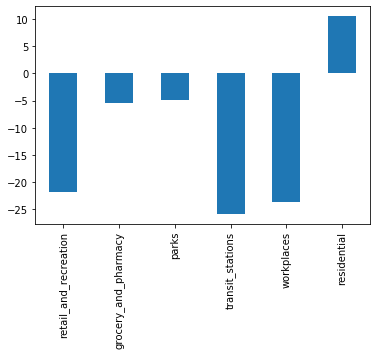

In [9]:
# mean of all vals for each col
des.loc['mean'].plot.bar();

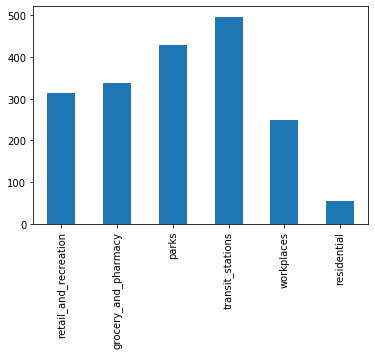

In [10]:
# max val for numeric cols
des.loc['max'].plot.bar();

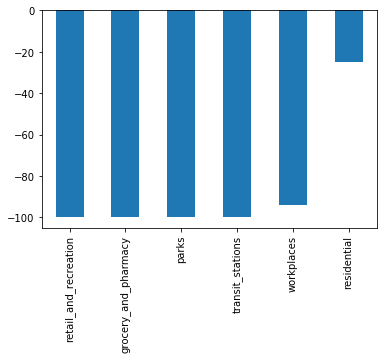

In [11]:
# min val for numeric cols
des.loc['min'].plot.bar();

In [12]:
# As observed from above, sample counts differ for each column

# let's also look at the numerical col with the smallest count
des.loc['count'].idxmin()

'parks'

In [13]:
# numerical col with the largest count
des.loc['count'].idxmax()

'workplaces'

In [14]:
# here we look at the count of nans for all cols in the dataset

#Only two cols (country_region and date) have no missing values
mobil_df.isna().sum()

country_region_code                                       85
country_region                                             0
sub_region_1                                           11220
sub_region_2                                          110756
date                                                       0
retail_and_recreation_percent_change_from_baseline     64008
grocery_and_pharmacy_percent_change_from_baseline      72496
parks_percent_change_from_baseline                    190119
transit_stations_percent_change_from_baseline         156777
workplaces_percent_change_from_baseline                11263
residential_percent_change_from_baseline              147564
dtype: int64

In [15]:
# the earliest and latest dates in the dataset (approx 3 months)
mobil_df.date.iloc[[0,-1]]

0         2020-02-15
335462    2020-05-09
Name: date, dtype: object

In [16]:
# lets also explore the number of countries in the dataset
len(set(mobil_df.country_region))

132

In [17]:
# print 5 countries in the dataset
list(set(mobil_df.country_region))[:5]

['Bahrain', 'Moldova', 'Trinidad and Tobago', 'Australia', 'Barbados']

In [18]:
# find the countries which had the missing country code
set(mobil_df[mobil_df.country_region_code.isna()].country_region)

{'Namibia'}

In [19]:
''' The dataset starts with the country's statistics as a whole and then breaks it down by region. Some countries have 
more regions and subregions than others, and some countries don't have statistics broken by region. Hence, 
some countries have more rows in the dataset than others. Nonetheless, for the purpose of this project, 
countries' statistics will be looked at as a whole and not be broken by region'''

# take a closer look at how rows are distributed for each country

group_country= mobil_df.groupby(by='country_region')


In [20]:
group_country.size().sort_values(ascending=False)

country_region
United States      229127
United Kingdom      12878
Slovenia             4315
Japan                4080
Romania              3655
                    ...  
Nicaragua              85
Niger                  85
North Macedonia        85
Oman                   85
Afghanistan            85
Length: 132, dtype: int64

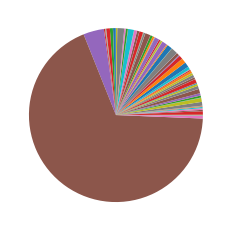

In [21]:
# as observed below, most rows belong to a single country (the US)
plt.pie(group_country.size().values);

In [22]:
#after processing the data, each county will have 85 rows (85 days to analyze)

#### Cases Dataset

In [23]:
# Look at beginning and ending date

# 1st date in dataset
print(cases_df.columns[4])

# last date in dataset
print(cases_df.columns[-1])

# As shown cases_df covers more dates, which goes from 15 Feb to 9 May

1/22/20
5/16/20


In [24]:
# check that duration for mobil_df start and end dates adds up to 85 days

date_cols=list(cases_df.columns[4:])

# start index
ind_i=date_cols.index('2/15/20')

# end index
ind_f=date_cols.index('5/9/20')

len(date_cols[ind_i:ind_f+1])

# There are no dates skipped

85

In [25]:
# There are more countries in cases dataset
len(set(cases_df['Country/Region']))

188

In [26]:
# check if all countries in mobil_df are present in cases_df

# countries in cases_df
cases_countries= list(set(cases_df['Country/Region']))

#countries in mobil_df
mobil_countries= list(set(mobil_df['country_region']))

def match_countries(bigger_lst, smaller_lst):
    """
    DESCRIPTION: returns elements in smaller list which did not occur in bigger list
        
    INPUT: bigger_lst - (list) list that contains country names
           smaller_lst - (list) list that contains fewer country names 
        
    OUTPUT: countries_not_found - (list) list of countries which were not found in bigger_lst
    """
    
    countries_not_found=[]

    # print countries in mobil_df which have no match in cases_df
    for country in smaller_lst:
        if not(country in bigger_lst):
            
            countries_not_found.append(country)
            
    # if missing countries were found 
    if countries_not_found!=[]: 
        
        # print them
        print('The following countries were not found in cases_df:')
        print(*countries_not_found)
    
    # sort to have the same order always
    return sorted(countries_not_found)

# these countries will be handled later in this project

In [27]:
countries_not_found=match_countries(cases_countries, mobil_countries)

The following countries were not found in cases_df:
Myanmar (Burma) South Korea Hong Kong Réunion Cape Verde United States Puerto Rico Taiwan Côte d'Ivoire The Bahamas Aruba


In [28]:
countries_not_found

['Aruba',
 'Cape Verde',
 "Côte d'Ivoire",
 'Hong Kong',
 'Myanmar (Burma)',
 'Puerto Rico',
 'Réunion',
 'South Korea',
 'Taiwan',
 'The Bahamas',
 'United States']

In [29]:
# check nans in the cases dataset

cases_df[date_cols].isna().sum().sum()

# no nans in the dates

0

## Methodology:

### Data Preprocessing:

In [30]:
def remove_sub_regions(df=mobil_df):
    """
    DESCRIPTION: this function removes all region-wise rows and returns only rows with values for the whole nation.
        
    INPUT: df - (pandas.DataFrame) mobility dataset
        
    OUTPUT: mobil_df_new - (pandas.DataFrame) mobility dataset with only rows for countries as a whole
    """
    # Eliminate all rows based on sub region

    # find rows with nan subregions
    nan_region= (mobil_df.sub_region_1.isna() & mobil_df.sub_region_2.isna())

    # select those rows
    mobil_df_new=mobil_df[nan_region]
    
    # Ensure every nation has the same number of rows
    group_country_no_reg= mobil_df_new.groupby(by='country_region') 
   
    # check if elements all equivalent
    if (group_country_no_reg.size()== group_country_no_reg.size()[0]).all():
        return mobil_df_new
    
    else:
        print("Something went wrong. Please check the input paramater")
        return -1
    

In [31]:
# call function and reset index (for simplification)
mobil_df_new=remove_sub_regions().reset_index(drop=True)

mobil_df_new.shape

(11220, 11)

In [32]:
# add new column for continent
import pycountry_convert as pc

use technique explained [here](https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry)

In [33]:
# check if all countries in the dataset have a code

for country in set(mobil_df_new.country_region):
    try:
        # if error it does not have the code
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        
    except:
        # print country name
        print(country)
        

Myanmar (Burma)
The Bahamas


In [34]:
def get_continent(country):
    
    """
    DESCRIPTION: return continent code given country name.
        
    INPUT: country - (str) country name
        
    OUTPUT: continent_code - (str) continent code for country
    """
    
    try:
        #get country code
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        # get continent code
        continent_code = pc.country_alpha2_to_continent_code(country_code)
    
        
    except:
        
        # given that there are only two countries that cause an exception
        # it's easy to deal with them manually
        
        if country=='The Bahamas':
            return 'NA'
        
        
        elif country=='Myanmar (Burma)':
            return 'AS'
        
        # Redundant case
        else: 
            print('Something Went Wrong')
            return -1
    
    return continent_code

In [35]:
# Check if it works on all countries

continent_lst=[]
countries = list(set(mobil_df_new.country_region))

for country in countries:
    
    continent= get_continent(country)
    continent_lst.append(continent)

countries[:10]   

['Bahrain',
 'Moldova',
 'Trinidad and Tobago',
 'Australia',
 'Barbados',
 'Spain',
 'Czechia',
 'Gabon',
 'Cambodia',
 'Switzerland']

In [36]:
continent_lst[:10]

['AS', 'EU', 'NA', 'OC', 'NA', 'EU', 'EU', 'AF', 'AS', 'EU']

In [37]:
# apply function to all rows in df
continents=mobil_df_new.country_region.apply(get_continent)

# add continents column to mobil_df_new
mobil_df_new['continent']= continents

In [38]:
mobil_df_new.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,continent
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0,AS
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0,AS
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0,AS
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0,AS
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0,AS


In [39]:
# rearrange columns and get rid of sub_region_1 and sub_reg

# get list of columns
cols=list(mobil_df_new.columns)

# replace sub_region_1 column with 'continent'
cols[2]=cols[-1]

# remove sub_region_2
cols.remove('sub_region_2')

# get rid of last element 'continent'
cols=cols[:-1]

In [40]:
mobil_df_new= mobil_df_new[cols]

mobil_df_new.head()

,country_region_code,country_region,continent,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,AS,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,AS,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,AS,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,AS,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,AS,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [41]:
# Now to concatenate cases_df with mobil_df_new
# Some chnages must be made on cases_df first

countries_not_found

['Aruba',
 'Cape Verde',
 "Côte d'Ivoire",
 'Hong Kong',
 'Myanmar (Burma)',
 'Puerto Rico',
 'Réunion',
 'South Korea',
 'Taiwan',
 'The Bahamas',
 'United States']

In [42]:
#Ad hoc method to match countries not found in both datasets

# Puerto Rico not present in cases_df

"""
Names of missing countries in cases_df

Burma
Taiwan*
Korea, South
US
Cabo Verde
Bahamas
Cote d'Ivoire

*Provinces:

Reunion
Hong Kong
Aruba
"""

names_in_cases= ['Aruba',
                 'Cabo Verde',
                 "Cote d'Ivoire",
                 'Hong Kong',
                 'Burma',
                 'Puerto Rico',
                 'Reunion',
                 'Korea, South',
                 'Taiwan*',
                 'Bahamas',
                 'US'
                ]

In [43]:
def change_names(countries_not_found=countries_not_found, names_in_cases=names_in_cases, cases_df=cases_df):
    """
    DESCRIPTION: return cases_df with country names that match with mobil_df
        
    INPUT: countries_not_found - (list) country names which were not found in cases_df
           names_in_cases - (list) country names that match countries_not_found but with different spelling
           
           NOTE: one country is missing from cases_df: Puerto Rico
        
    OUTPUT: new_country_ser - (pandas.Series) cases_df['Country/Region'] with modified country names
    """
    # get country/region column
    countries_col= cases_df['Country/Region'].values
    
    # get province column
    province_col=cases_df['Province/State'].values
    
    new_country_ser=cases_df['Country/Region'].copy()
    
    # loop through every country in names_in_cases and countries_not_found
    for cases_name, mobil_name in zip(names_in_cases, countries_not_found):
        
        if cases_name in countries_col:
            # replace country_name with
            if cases_name=='Taiwan*':
                
                # cannot be remove '*' with replace so use strip
                new_country_ser=new_country_ser.str.strip('*')
            
            else:
                # other names are ok
                new_country_ser=new_country_ser.str.replace(cases_name, mobil_name)
        
            
        elif cases_name in province_col:
            
            # find index at which cases_name == province
            index=cases_df[cases_df['Province/State']==cases_name].index[0]
            
            # replace current value with cases_name
            new_country_ser.loc[index]=mobil_name
        else:
            print('The following country did not have a match: {}'.format(cases_name))
    
    return new_country_ser       
            

In [44]:
cases_countries= list(set(change_names()))

#check now if there are missing countries
match_countries(cases_countries, mobil_countries)

The following country did not have a match: Puerto Rico
The following countries were not found in cases_df:
Puerto Rico


['Puerto Rico']

In [45]:
# now to add the new col to the datset
new_col= change_names()
    
cases_df['Country/Region']=new_col

The following country did not have a match: Puerto Rico


In [46]:
# in the cases dataset there are countries which don't have their numbers summed up in one row
cases_group_countries= cases_df.groupby(by='Country/Region')

cases_group_countries.size().sort_values(ascending=False)

Country/Region
China             32
Canada            14
United Kingdom    11
France            10
Australia          8
                  ..
Nicaragua          1
New Zealand        1
Nepal              1
Namibia            1
Afghanistan        1
Length: 191, dtype: int64

In [47]:
# these rows will need to be reduced to one
cases_df_new=cases_group_countries.sum()

In [48]:
# ensure num_countries matches number of rows in the dataset
cases_df_new.shape[0]==len(cases_countries)

True

In [49]:

# now to limit cases_df_new to start-end dates of mobil_df
cases_df_new=cases_df_new[date_cols[ind_i:ind_f+1]]

In [50]:
def create_cases_col(countries_ordered, days=85, cases_df_new=cases_df_new):
    
    """
    DESCRIPTION: create a cases col to concatenate with mobil_df_new
        
    INPUT: countries_ordered - (list) countries list arranged in the same manner as mobil_df_new
           days - (int) number of days in the dataset
           cases_df_new - (pandas.DataFrame) use its values to fill col 
        
    OUTPUT: cases_col - (list) column with len==mobil_df_new.shape[0]
    """
    
    # transpose cases_df_new for easier handeling
    new_cases_transpose= cases_df_new.transpose()
    
    # create an empty list 
    cases_col= []
    
    # create a list of nans for countries not in dataset
    nans=[np.nan for i in range(days)]
    
    # loop through every country
    for country in countries_ordered:
        
        try:
            # add the country's values to the list
            cases_col.extend(cases_df_new.loc[country])
            
        except:
            # country not in dataset, ie Puerto Rico
            cases_col.extend(nans)
            
    
    return cases_col
    

In [51]:
# get ordered list
countries_ordered=list(pd.unique(mobil_df_new.country_region))

#create cases_col
cases_col=create_cases_col(countries_ordered=countries_ordered)

In [52]:
# add col to dataframe
mobil_df_new['corona_cases']= cases_col

In [53]:
# Final form
mobil_df_new.head()

,country_region_code,country_region,continent,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,corona_cases
0,AE,United Arab Emirates,AS,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0,8.0
1,AE,United Arab Emirates,AS,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0,9.0
2,AE,United Arab Emirates,AS,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0,9.0
3,AE,United Arab Emirates,AS,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0,9.0
4,AE,United Arab Emirates,AS,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0,9.0


## Implementation

In [54]:
"""For each country, we will look at all location types individually and determine greatest mobility slow-down based on
    changes from baseline and the time at which they were reached"""

# use groupby to get the values based on country
group_country=mobil_df_new.groupby(by='country_region')

In [55]:
# create dataframe with minimum mobility
min_df=group_country.min()

# max residential reflects min mobility
min_df['residential_percent_change_from_baseline']= group_country.max()['residential_percent_change_from_baseline']


In [56]:
# get 10 countries with greatest mobility drop

get_first_n= lambda col: col.nsmallest(10).index 

# get n countries with least mobility drop
get_last_n= lambda col: col.nlargest(10).index 

In [57]:
def sort_and_plot(col_name, op='min', n=10, df=min_df):
    """
    DESCRIPTION: sort values for the specified column in an ascending order, and plot n largest and smallest values
        
    INPUT: col_name - (str) name of column in df
           op - (str) type of df (min or max)
           n - (str) number of countries to graph 
           df - (pandas.DataFrame) used to sort and plot values
        
    OUTPUT: col_sorted - (pandas.Series) sorted col_name column from df 
    """
    
    # get col with sorted values
    col_sorted= df[col_name].sort_values()
    
    # for plot title
    response_1=''
    response_2=''
    
    if op=='min':
        # in case df is min
        response_1='greatest'
        response_2='least'
    else:
        # case df is max
        response_1='least'
        response_2='greatest'
    
    # plot n countries with greatest negative change in mobility
    col_sorted.nsmallest(n).plot.barh(color= ['g',
                                              'b',
                                              'r',
                                              'y',
                                              'c', 
                                              'firebrick',
                                              'gold',
                                              'lime',
                                              'orange',
                                              'gray']);
    plt.ylabel('Country');
    plt.xlabel('Change from Baseline');
    plt.title('{} in {}: countries with {} response'.format(op, 
                                                            col_name.replace('_percent_change_from_baseline', ''), 
                                                            response_1));
    plt.show()
    
    
    # plot n countries with least change in mobility
    col_sorted.nlargest(n).plot.barh(color= ['g',
                                              'b',
                                              'r',
                                              'y',
                                              'c', 
                                              'firebrick',
                                              'gold',
                                              'lime',
                                              'orange',
                                              'gray']);
    plt.ylabel('Country');
    plt.xlabel('Change from Baseline');
    plt.title('{} in {}: countries with {} response'.format(op, 
                                                               col_name.replace('_percent_change_from_baseline', ''),
                                                               response_2));
    plt.show()
    
    return col_sorted
    
    

In [58]:
'''finding min and max is easy enough, however more work needed to be done to find dates at which they occurred'''

# get indecies at which min occurs
min_idx_df= group_country.idxmin()

# get max indecies for Residential
min_idx_df['residential_percent_change_from_baseline']= group_country.idxmax()['residential_percent_change_from_baseline']



# define following function to find max and min dates for specified column
def get_date(col_name, df=mobil_df_new, idx_df=min_idx_df):
    """
    DESCRIPTION: get series of dates given series of indecies. also plots dates in one dimension
        
    INPUT: col_name - (str) name of column in df 
           df - (pandas.DataFrame) the data
           idx_df - (pandas.DataFrame) df which has min index for every col&country combination
        
    OUTPUT: col_min_dates - (pandas.Series) column with dates where min occurs for col_name  
    """
    
    # get the indexes for specified column
    col_min_index=idx_df[col_name]
    
    # do not consider countries which had all nans for col
    col_min_index=col_min_index.dropna()
    
    # ensure index is int
    col_min_index=col_min_index.astype(int)
    
    # def lambda to get and index and return a date
    get_date= lambda index: df.loc[index]['date']
    
    # apply to col with min indicies
    col_min_dates= col_min_index.apply(get_date)
    
    
    return col_min_dates


In [59]:
# look at output of function
dates=pd.to_datetime(get_date('parks_percent_change_from_baseline'))
dates

country_region
Afghanistan           2020-05-03
Angola                2020-04-10
Antigua and Barbuda   2020-04-10
Argentina             2020-04-19
Aruba                 2020-04-10
                         ...    
Venezuela             2020-04-10
Vietnam               2020-04-04
Yemen                 2020-04-24
Zambia                2020-04-19
Zimbabwe              2020-04-03
Name: parks_percent_change_from_baseline, Length: 131, dtype: datetime64[ns]

In [60]:
'''create the min mobility dates dataframe'''

# retail-residential
cols_min= min_idx_df.columns[:-1]

# dates at which min mobility occur for particular location type and country
dates_df=pd.DataFrame(map(get_date, min_idx_df[cols_min])).transpose()

# convert dates to datetime
dates_df=dates_df.apply(pd.to_datetime)

In [61]:
# define a function to get n countries with earliest and latest mobility slow-down
def earliest_countries(col, n=10):
    
    """
    DESCRIPTION: create 2 dataframes with n earliest and n latest countries in response (to reach min)
        
    INPUT: col - (pandas.Series) col from dataframe
 
    OUTPUT: nsmallest.index - (pandas.core.indexes.base.Index) n countries with earliest date
            
              
    """
    # get 10 countries with earliest date
    nsmallest= col.nsmallest(n)
    
    # return name of country
    return nsmallest.index
    
        

In [62]:
# define a function to get n countries with earliest and latest mobility slow-down
def latest_countries(col, n=10):
    
    """
    DESCRIPTION: create 2 dataframes with n earliest and n latest countries in response (to reach min)
        
    INPUT: col - (pandas.Series) col from dataframe
 
    OUTPUT: nlargest_df - (pandas.core.indexes.base.Index) n countries with latest date
              
    """
    # get 10 countries with earliest date
    nlargest= col.nlargest(n)
    
    # return name of country
    return nlargest.index
    
        

In [63]:
# Plot the dates in 1-d 
def show_timeline(cols, dates=None, dates_for=''):
   
    """
    DESCRIPTION: plots dates of min/max occurrance in one dimension for all cols
        
    INPUT: cols - (list) list of column names to plot 
 
    OUTPUT:   
    """
    
    # if dates is not provided, This is used to plot countries
    if dates is None:
        # loop through every column
        for i, col in enumerate(cols):


            # get dates ready for plotting
            dates=pd.to_datetime(get_date(col))

            # for plotting in 1-d
            y=np.zeros(dates.shape)

            plt.scatter(x=dates, y=y-i, label=col.replace('_percent_change_from_baseline', ''));
        
        plt.title(' One Dimensional\nDates at which countries reached the slowest mobility');
    
    # used to plot others, e.g. continents
    else:
        # loop through every column
        for i, col in enumerate(cols):


            # get dates ready for plotting
            col_dates=dates[col]

            # for plotting in 1-d
            y=np.zeros(col_dates.shape)

            plt.scatter(x=col_dates, y=y-i, label=col.replace('_percent_change_from_baseline', ''));
            
        plt.title(' One Dimensional\nDates at which {} reached the slowest mobility'.format(dates_for));

   
    plt.xlabel('date')
    plt.ylabel('for seperation')
    start= pd.to_datetime('2020-2')
    end= pd.to_datetime('2020-7')
    plt.xlim((start, end))
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

In [64]:
'''Implement continent analysis: average mobility slow-down'''

def get_continent_mean(df=min_df.drop('corona_cases', axis=1)):
    """
    DESCRIPTION: gets the mean of min mobility for each continent
        
    INPUT: df - (pandas.DataFrame) country for index, location types for columns, mins for values.
 
    OUTPUT: continent_mean_df - (pandas.DataFrame) dataframe with mean for each continent and location type 
    """
    # group mins based on continent
    group_continent_min= df.groupby(by='continent')

    # Compute mean of mins for each continent
    continent_mean_df=group_continent_min.mean()
    
    return continent_mean_df

In [65]:
'''Implement continent analysis: mean dates of mobility slow-down'''

def get_continent_mean_date(df=dates_df, continent_col=min_df.continent):
    """
    DESCRIPTION: gets the median date at which min occurs for each continent and location type
        
    INPUT: df - (pandas.DataFrame) country for index, location types for columns, dates for values.
           continent_col - (pandas.Series) continent column from dataset
 
    OUTPUT: continent_median_date - (pandas.DataFrame) dataframe with mean date for each continent and location type 
    """
    # make a copy of df
    df_new=df.copy()
    
    # add continent column
    df_new['continent']= continent_col
    
    # group mins based on continent
    group_continent_min_date= df_new.groupby(by='continent')
    
    # get list of continents
    continents=list(group_continent_min_date.groups.keys())
    
    # create df to fill
    continent_mean_date_df=pd.DataFrame(columns=group_continent_min_date.dtypes.columns)
    
    # cannot obtain mean date from groupby
    for continent in continents:
        
        #print(group_continent_min_date.get_group(continent))
        
        # for continent, get mean for all cols
        mean_date=group_continent_min_date.get_group(continent).apply(pd.Series.mean)
        
        # get rid of time and keep date
        mean_date_only=mean_date.apply(pd.Timestamp.date)
        
        # put in dataframe
        continent_mean_date_df.loc[continent]= mean_date_only
    
    
    return continent_mean_date_df

## Refinement

In [66]:
''' Because column names are long, dataframe will look too wide. It will be nicer to get rid of 
    "percent_change_from baseline", which prevents from looking at data in a simplified manner '''

# use this function to make data easier to look at
def clean_col_name(df):
    
    """
    DESCRIPTION: remove long form of column name
        
    INPUT: df - (pandas.DataFrame) dataframe for which columns are replaced
 
    OUTPUT: df_new - (pandas.DataFrame) ==df with short version of column names
    """
    # remove '_percent_change_from_baseline'
    reduce= lambda col_name: col_name.replace('_percent_change_from_baseline', '')

    # make a copy of df
    df_new=df.copy()
    
    # dates dataframe
    df_new.columns= list(map(reduce, df_new.columns))

    return df_new

#### Solving problems with min day

In [67]:
'''The method (metric) employed in observing global mobility in the times of covid-19 has several issues.
   one of these issues is special events, which could cause a considerable change from baseline while not having any
   relation to the virus. For this reason, a new method will take the average of a week and determine which week had 
   the lowest average in mobility. This will help circumvent the problem with special events'''

def get_week_avg(col):
    """
    DESCRIPTION: get average value in a week for numeric and date columns
        
    INPUT: col - (pandas.Series) column which is divided in weeks
 
    OUTPUT: means_col - (pandas.Series) col with the mean of every week 
    """
    
    # get number of weeks
    num_weeks= int(col.shape[0]/7)
    
    # get remainder days (to add to the last week)
    rem= col.shape[0] % 7
    
    means= []
    
    # check if col is a dates col
    if isinstance(col.iloc[0], str):
    
        # loop for every week
        for i in range(num_weeks):

            # if last week
            if i==(num_weeks-1):
                week=pd.to_datetime(col.iloc[i*7:])


            else:
                # take elements by week
                week=pd.to_datetime(col.iloc[i*7:(i+1)*7])


            # take the mean and append date only
            means.append(week.mean().date())
    
    # case if col is not a date col (numeric)
    else:
        
        # loop for every week
        for i in range(num_weeks):

            # if last week
            if i==(num_weeks-1):
                
                # append all values beginning from final week
                week=col.iloc[i*7:]


            else:
                # take elements by week
                week=col.iloc[i*7:(i+1)*7]


            # append mean of week to list
            means.append(week.mean())
            
    means_col= pd.Series(means)
    
    return means_col    

In [68]:
def country_in_weeks(col):
    """
    DESCRIPTION: organize country code and continent row to look at week-wise
        
    INPUT: col - (pandas.Series) column which is divided in weeks
 
    OUTPUT: ser - (pandas.Series) country code or continent with num_weeks elements
    """
    
    # get number of weeks in data
    num_weeks= int(col.shape[0]/7)
    
    # get only num_weeks elements and reset index to match avg_week function
    ser=col.iloc[:num_weeks].reset_index(drop=True)
    
    return ser
    

In [69]:
'''Use two functions above to create a mobility dataset organized week-wise with values in averages.
   covid-cases col will be dropped because it is not in the scope of the analysis'''

def create_mobil_week(group=group_country, countries=countries_ordered, columns=list(mobil_df_new)[:-1], 
                      country_attribute_cols=['country_region_code', 'continent'], cols_to_drop=[],
                      group_col='country_region'):
    """
    DESCRIPTION: get average of every week for every country
        
    INPUT: group - (pandas.core.groupby.generic.DataFrameGroupBy) dataset grouped by country
           countries - (list) list of countries as ordered as dataset (mobil_df_new)
           columns - (list) list of columns in dataset (except corona_cases if default)
           country_attribute_cols - (list) specifies cols which are attributes of country
           cols_to_drop - (list) columns to not include from dataset
           group_col - (str) column by which dataset was grouped
 
    OUTPUT: df_week - (pandas.DataFrame) dataset reduced to week averages 
    """
    
    # create df_week dataframe
    df_week=pd.DataFrame(columns=columns)
    
    
    # loop through every country to get average
    for country in countries:
        
        # get rows of country
        country_df=group.get_group(country)
        
        # ready country_df for get_avg_week
        country_df_date_numeric= country_df.drop(labels=country_attribute_cols+cols_to_drop, axis=1)
        
        # ready country_df for country_in_weeks
        country_df_country_cols= country_df[country_attribute_cols]
        
        # get week numeric averages and week mid date
        temp_df_1= country_df_date_numeric.apply(get_week_avg)
        
        # get country attribute cols to match num rows of temp_df_1
        temp_df_2= country_df_country_cols.apply(country_in_weeks)
        
        # get country_region col
        temp_col=pd.Series([country for i in range(temp_df_1.shape[0])], name=group_col)
        
        # concatenate temps
        concat= pd.concat([temp_col, temp_df_2 , temp_df_1], axis=1, sort= True)
        
        # append concat df to df_week
        df_week=df_week.append(concat, sort=True)
        
    # reset df_week index
    df_week=df_week.reset_index(drop=True)
    
    # organize columns to have the same order as mobil_df_new
    df_week= df_week[columns]
        
        
    return df_week   

In [70]:
mobil_df_week=create_mobil_week(cols_to_drop=['corona_cases'])

In [71]:
# group mobil_df_week by country and create min_week_df and min_week_idx_df to use for implementation functions

# group by country
group_country_week= mobil_df_week.groupby(by='country_region')

# find greatest mobility drop (week avg)
min_week_df=group_country_week.min()

# modify resedential
min_week_df['residential_percent_change_from_baseline']= group_country_week.max()['residential_percent_change_from_baseline']

# find index at which it occurs (median date of the week)
min_week_idx_df= group_country_week.idxmin()

# modify resedential
min_week_idx_df['residential_percent_change_from_baseline']= group_country_week.idxmax()['residential_percent_change_from_baseline']


In [72]:
# create dates_df_week for implementation functions

# retail-resedential
cols_min= list(min_week_idx_df.columns)

# define lambda function to for get date with differents arguments
get_week_date= lambda col_name: get_date(col_name=col_name, df=mobil_df_week, idx_df=min_week_idx_df)

# dates at which min occur for particular location type and country
dates_df_week=pd.DataFrame(map(get_week_date, cols_min)).transpose()

# convert it from datetime.date to datetime
dates_df_week= dates_df_week.apply(pd.to_datetime)

## Results

#### Results without refinement:

#### First to take a look at continents

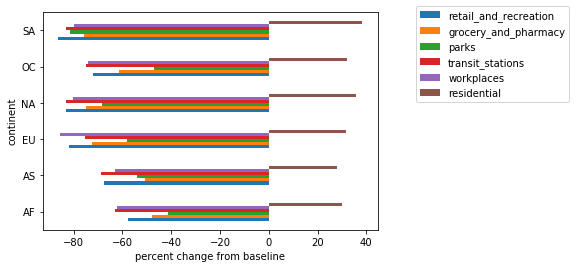

In [73]:
'''take average over max mobility drop in every country for each continent and plot result'''
# plot continent analysis
continent_mean_df=clean_col_name(get_continent_mean())
continent_mean_df.plot.barh();
plt.legend(bbox_to_anchor=(1.1, 1.05));
plt.xlabel('percent change from baseline');

# As shown, Africa on average did not experience huge drop in mobility as much as other continents

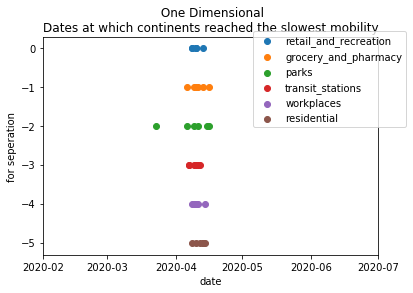

In [74]:
# get a look at continents mean date of reaching slowest mobility - each dot is represents a continent' date
continent_dates=get_continent_mean_date()
cols=continent_dates.columns

show_timeline(cols=cols, dates=continent_dates, dates_for='continents')

In [75]:
# a look at the actual data
clean_col_name(continent_dates)

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
AF,2020-04-13,2020-04-11,2020-04-15,2020-04-12,2020-04-11,2020-04-14
AS,2020-04-08,2020-04-06,2020-04-11,2020-04-07,2020-04-10,2020-04-13
EU,2020-04-10,2020-04-13,2020-03-23,2020-04-10,2020-04-14,2020-04-13
NA,2020-04-08,2020-04-09,2020-04-09,2020-04-11,2020-04-09,2020-04-12
OC,2020-04-10,2020-04-10,2020-04-16,2020-04-07,2020-04-10,2020-04-10
SA,2020-04-10,2020-04-16,2020-04-06,2020-04-09,2020-04-08,2020-04-08


#### Now break down by country: look at dates at which countries reached minimum mobility

In [76]:
cols=list(mobil_df_new.columns[4:-1])

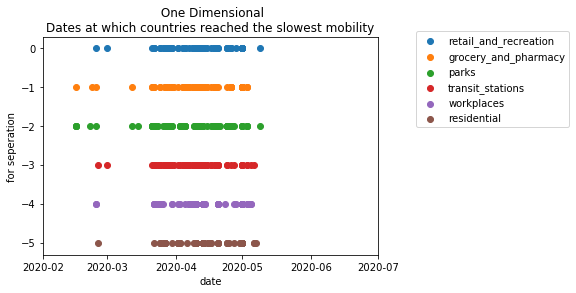

In [77]:
# dates at which counties experienced greatest mobility slow-down 
# each dot represents a country's date of max drop
show_timeline(cols)

In [78]:
# get short col version of dates
dates_df_clean=clean_col_name(dates_df)

In [79]:
# countries with earliest mobility slow-down (starts with earliest country)
dates_df_clean.apply(earliest_countries, axis=0)

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Mongolia,Taiwan,Denmark,Mongolia,Angola,Mongolia
1,South Korea,South Korea,Finland,South Korea,Mongolia,Jordan
2,Sri Lanka,Mongolia,Netherlands,Sri Lanka,Iraq,Bosnia and Herzegovina
3,Austria,Egypt,Sweden,Bosnia and Herzegovina,Jordan,Greece
4,Bulgaria,Iraq,Latvia,Iraq,Kuwait,Mauritius
5,Malta,Sri Lanka,South Korea,Malta,Oman,Iraq
6,Slovenia,India,Mongolia,Argentina,Argentina,Croatia
7,Greece,Liechtenstein,Norway,Croatia,Pakistan,Ecuador
8,Mauritius,Malaysia,Austria,Greece,Ecuador,Lebanon
9,Iraq,Greece,Czechia,Libya,Greece,Moldova


In [80]:
# countries with latest mobility slow-down (starts with latest country)
dates_df_clean.apply(latest_countries, axis=0)

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Tajikistan,Senegal,Tajikistan,Japan,South Korea,Yemen
1,Bosnia and Herzegovina,Tajikistan,Afghanistan,Tajikistan,Tajikistan,Japan
2,Finland,Yemen,Mali,Honduras,Japan,Tajikistan
3,Germany,Argentina,Papua New Guinea,Mali,Bahrain,Barbados
4,Mali,Bosnia and Herzegovina,Philippines,Benin,Yemen,Belarus
5,Senegal,Cape Verde,Bangladesh,Liechtenstein,Bosnia and Herzegovina,Belgium
6,Sweden,Chile,Kenya,Niger,Cambodia,Belize
7,Tanzania,Finland,Nigeria,Senegal,Cameroon,France
8,Uruguay,France,Senegal,Uruguay,Hong Kong,Indonesia
9,Nigeria,Réunion,Haiti,Afghanistan,Kazakhstan,Italy


In [81]:
# Mongolia is earliest to reduce time spent in public locations and increase stay at home 
dates_df_clean.loc['Mongolia']

retail_and_recreation   2020-02-25
grocery_and_pharmacy    2020-02-25
parks                   2020-03-12
transit_stations        2020-02-26
workplaces              2020-02-25
residential             2020-02-26
Name: Mongolia, dtype: datetime64[ns]

In [82]:
# South Korea had an early response with public places but late for workplaces
dates_df_clean.loc['South Korea']

retail_and_recreation   2020-03-01
grocery_and_pharmacy    2020-02-23
parks                   2020-02-25
transit_stations        2020-03-01
workplaces              2020-05-05
residential             2020-04-15
Name: South Korea, dtype: datetime64[ns]

#### Take a look at mobility drops by country
##### For simplification we'll look at 10 countries with greatest drop and 10 countries with least drop

In [83]:
# modify min_df to have only baseline cols, and to have residential be consistent with other lambda functions
min_df_mod= min_df.copy()

# flip sign of values
min_df_mod.residential_percent_change_from_baseline=-min_df.residential_percent_change_from_baseline

# select columns of interest
min_df_mod= min_df_mod[min_df_mod.columns[3:-1]]

# 10 countries with greatest mobility drop
clean_col_name(min_df_mod).apply(get_first_n)

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Réunion,The Bahamas,Réunion,The Bahamas,Israel,Singapore
1,Serbia,Serbia,Argentina,Barbados,Luxembourg,Botswana
2,The Bahamas,Aruba,Italy,Jordan,Antigua and Barbuda,Peru
3,Aruba,Peru,Bolivia,Peru,Aruba,The Bahamas
4,Israel,Réunion,Peru,Antigua and Barbuda,Mauritius,Panama
5,Italy,Antigua and Barbuda,Spain,Belize,Serbia,Zimbabwe
6,Panama,Barbados,Barbados,North Macedonia,Barbados,Bolivia
7,Peru,Bolivia,Aruba,Serbia,Italy,Sri Lanka
8,Spain,North Macedonia,Mauritius,Aruba,Liechtenstein,Portugal
9,Antigua and Barbuda,Panama,Portugal,Bolivia,North Macedonia,Ecuador


In [84]:
# 10 countries with least mobility drop
clean_col_name(min_df_mod).apply(get_last_n)

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Yemen,Taiwan,Zambia,Yemen,Yemen,Yemen
1,Taiwan,Yemen,Benin,Cameroon,Mali,Belarus
2,Benin,Japan,Belarus,Tanzania,Cameroon,Taiwan
3,Niger,South Korea,Papua New Guinea,Zambia,Qatar,Cambodia
4,Cameroon,Hong Kong,Burkina Faso,Taiwan,Tajikistan,Cameroon
5,Zambia,Niger,Finland,South Korea,Bahrain,Haiti
6,Mali,Benin,Haiti,Belarus,Libya,South Korea
7,Burkina Faso,Zambia,Mali,Benin,Niger,Tajikistan
8,Hong Kong,Cameroon,Latvia,Niger,Afghanistan,Afghanistan
9,Tanzania,Sweden,Tanzania,Côte d'Ivoire,Burkina Faso,Tanzania


#### Below are plots showing 10 greatest and least mobility drops for location type

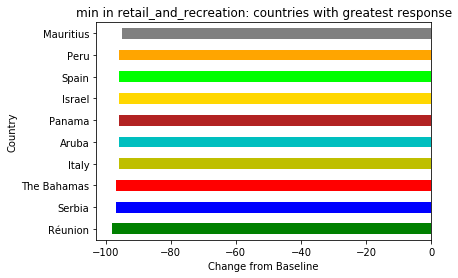

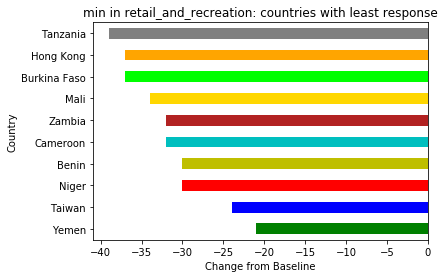

country_region
Réunion       -98.0
Serbia        -97.0
The Bahamas   -97.0
Italy         -96.0
Aruba         -96.0
               ... 
Zambia        -32.0
Niger         -30.0
Benin         -30.0
Taiwan        -24.0
Yemen         -21.0
Name: retail_and_recreation_percent_change_from_baseline, Length: 132, dtype: float64

In [85]:
# retail and reacreation
sort_and_plot('retail_and_recreation_percent_change_from_baseline')

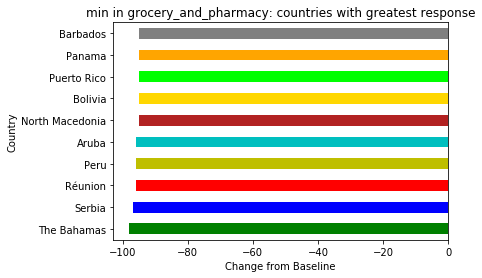

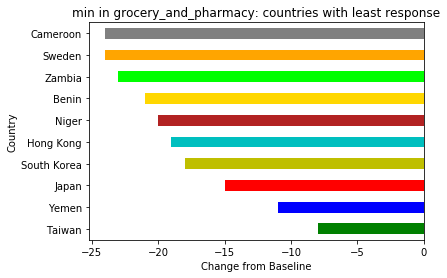

country_region
The Bahamas   -98.0
Serbia        -97.0
Réunion       -96.0
Peru          -96.0
Aruba         -96.0
               ... 
Hong Kong     -19.0
South Korea   -18.0
Japan         -15.0
Yemen         -11.0
Taiwan         -8.0
Name: grocery_and_pharmacy_percent_change_from_baseline, Length: 132, dtype: float64

In [86]:
# grocery and pharamcy
sort_and_plot('grocery_and_pharmacy_percent_change_from_baseline')

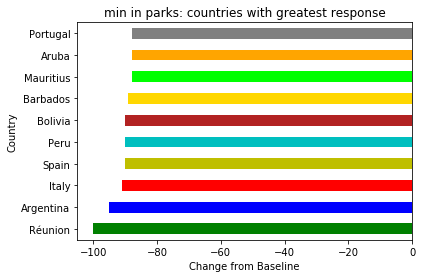

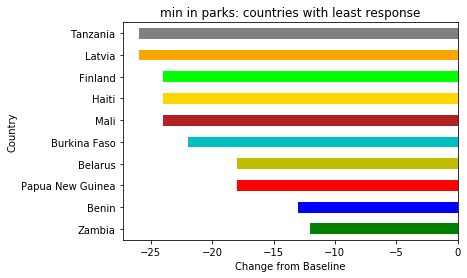

country_region
Réunion            -100.0
Argentina           -95.0
Italy               -91.0
Spain               -90.0
Peru                -90.0
                    ...  
Papua New Guinea    -18.0
Belarus             -18.0
Benin               -13.0
Zambia              -12.0
Liechtenstein         NaN
Name: parks_percent_change_from_baseline, Length: 132, dtype: float64

In [87]:
# parks
sort_and_plot('parks_percent_change_from_baseline')

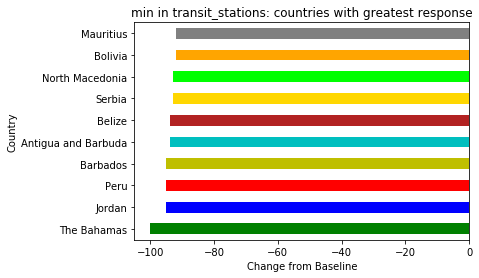

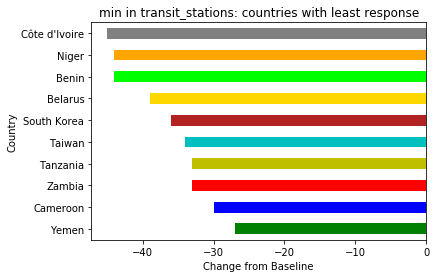

country_region
The Bahamas           -100.0
Jordan                 -95.0
Peru                   -95.0
Barbados               -95.0
Antigua and Barbuda    -94.0
                       ...  
Zambia                 -33.0
Tanzania               -33.0
Cameroon               -30.0
Yemen                  -27.0
Guinea-Bissau            NaN
Name: transit_stations_percent_change_from_baseline, Length: 132, dtype: float64

In [88]:
# transit stations
sort_and_plot('transit_stations_percent_change_from_baseline')

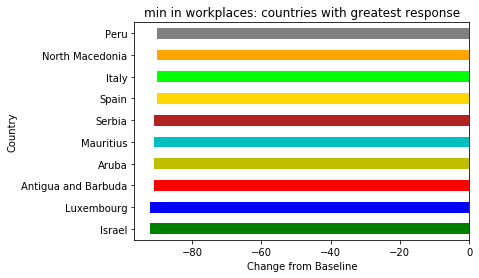

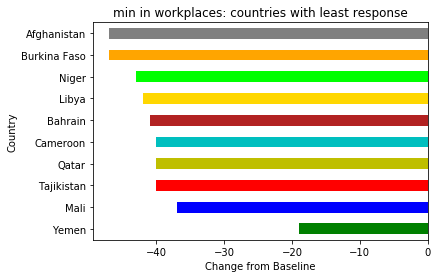

country_region
Israel                -92.0
Luxembourg            -92.0
Antigua and Barbuda   -91.0
Aruba                 -91.0
Mauritius             -91.0
                       ... 
Tajikistan            -40.0
Qatar                 -40.0
Cameroon              -40.0
Mali                  -37.0
Yemen                 -19.0
Name: workplaces_percent_change_from_baseline, Length: 132, dtype: float64

In [89]:
# workplaces
sort_and_plot('workplaces_percent_change_from_baseline')

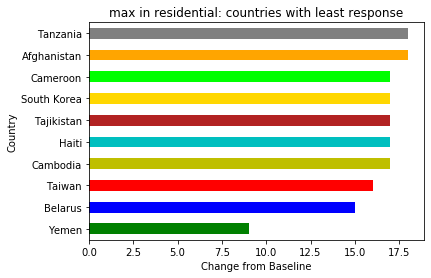

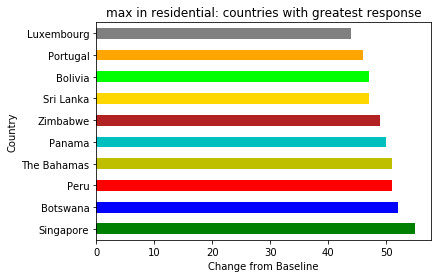

country_region
Yemen             9.0
Belarus          15.0
Taiwan           16.0
Cambodia         17.0
Haiti            17.0
                 ... 
Botswana         52.0
Singapore        55.0
Guinea-Bissau     NaN
Liechtenstein     NaN
Réunion           NaN
Name: residential_percent_change_from_baseline, Length: 132, dtype: float64

In [90]:
# for resedential it is different because people will spend more time at home. for that reason max() is used

# residential
sort_and_plot('residential_percent_change_from_baseline', op='max')

#### Results with refinement: a look at continents

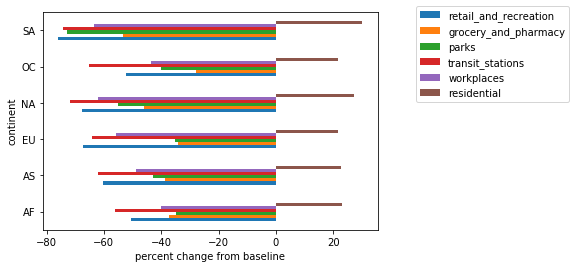

In [91]:
'''take average over max mobility drop in every country for each continent and plot result'''
# plot continent analysis
continent_mean_df=clean_col_name(get_continent_mean(df=min_week_df))
continent_mean_df.plot.barh();
plt.legend(bbox_to_anchor=(1.1, 1.05));
plt.xlabel('percent change from baseline');

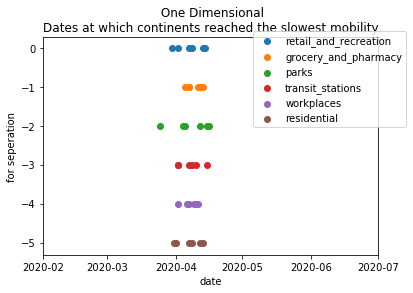

In [92]:
# get a look at continents mean date of reaching slowest mobility - each dot is represents a continent' date
continent_dates=get_continent_mean_date(df=dates_df_week, continent_col=min_week_df.continent)
cols=continent_dates.columns
show_timeline(cols=cols, dates=continent_dates, dates_for='continents')

In [93]:
# a look at the actual data
'''Below is the mean date at which a country has a week of min mobility for each continent'''
clean_col_name(continent_dates)

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
AF,2020-04-14,2020-04-13,2020-04-16,2020-04-15,2020-04-09,2020-04-13
AS,2020-04-13,2020-04-07,2020-04-12,2020-04-10,2020-04-11,2020-04-12
EU,2020-04-02,2020-04-07,2020-03-25,2020-04-02,2020-04-10,2020-04-01
NA,2020-04-08,2020-04-12,2020-04-05,2020-04-08,2020-04-06,2020-04-07
OC,2020-04-07,2020-04-05,2020-04-15,2020-04-07,2020-04-07,2020-04-08
SA,2020-03-30,2020-04-11,2020-04-04,2020-04-02,2020-04-02,2020-03-31


#### Results with refinement: a look at countries

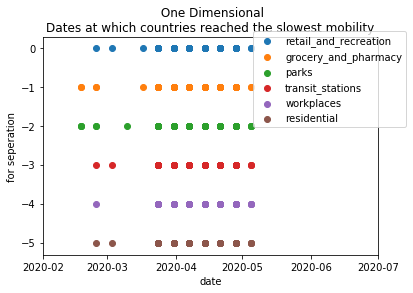

'The dots in this case represent the week at which a country reached min mobility'

In [94]:
# dates at which counties experienced greatest mobility slow-down 
# each dot represents a country's date of max drop
show_timeline(cols=cols, dates=dates_df_week.dropna(), dates_for='countries')
'''The dots in this case represent the week at which a country reached min mobility'''

In [95]:
# get short col version of dates
dates_df_week_clean=clean_col_name(dates_df_week)

In [96]:
# countries with earliest mobility slow-down (starts with earliest country)
dates_df_week_clean.apply(earliest_countries, axis=0)

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Mongolia,Hong Kong,Denmark,Mongolia,Mongolia,Mongolia
1,South Korea,Taiwan,Finland,South Korea,Argentina,South Korea
2,Norway,Mongolia,Sweden,Argentina,Austria,Argentina
3,Argentina,South Korea,Mongolia,Austria,Bosnia and Herzegovina,Austria
4,Austria,Norway,South Korea,Bosnia and Herzegovina,Brazil,Bosnia and Herzegovina
5,Bosnia and Herzegovina,Argentina,Norway,Brazil,France,Brazil
6,Brazil,Austria,Austria,Bulgaria,Guatemala,Bulgaria
7,Bulgaria,Brazil,Bosnia and Herzegovina,Czechia,Iraq,Croatia
8,Colombia,Bulgaria,Brazil,Denmark,Italy,Czechia
9,Croatia,Czechia,Bulgaria,Ecuador,Jordan,Denmark


In [97]:
# countries with latest mobility slow-down (starts with latest country)
dates_df_week_clean.apply(latest_countries, axis=0)

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Philippines,Panama,Afghanistan,Japan,Bahrain,Bahrain
1,Tajikistan,Tajikistan,Papua New Guinea,Niger,Japan,Japan
2,Afghanistan,Benin,Philippines,Tajikistan,Tajikistan,Tajikistan
3,Bahrain,Bolivia,Tajikistan,Belarus,Yemen,Yemen
4,Indonesia,Chile,Bangladesh,Benin,Belarus,Afghanistan
5,Kuwait,Indonesia,Benin,Indonesia,Indonesia,Antigua and Barbuda
6,Mali,Italy,Indonesia,Kuwait,Kuwait,Indonesia
7,Niger,Kuwait,Kuwait,Mali,Qatar,Kuwait
8,Nigeria,Luxembourg,Mali,Mexico,Senegal,Mali
9,Qatar,Mali,Mexico,Senegal,Singapore,Niger


In [98]:
# Mongolia is earliest to reduce time spent in public locations and increase stay at home 
dates_df_week_clean.loc['Mongolia']

retail_and_recreation   2020-02-25
grocery_and_pharmacy    2020-02-25
parks                   2020-02-25
transit_stations        2020-02-25
workplaces              2020-02-25
residential             2020-02-25
Name: Mongolia, dtype: datetime64[ns]

In [99]:
# South Korea had an early response with public places but late for workplaces
dates_df_week_clean.loc['South Korea']

retail_and_recreation   2020-03-03
grocery_and_pharmacy    2020-02-25
parks                   2020-02-25
transit_stations        2020-03-03
workplaces              2020-04-28
residential             2020-03-03
Name: South Korea, dtype: datetime64[ns]

#### Take a look at mobility drops by country
##### For simplification we'll look at 10 countries with greatest drop and 10 countries with least drop

In [100]:
# modify min_week_df to have only baseline cols, and to have residential be consistent with other lambda functions
min_week_df_mod= min_week_df.copy()

# flip sign of values
min_week_df_mod.residential_percent_change_from_baseline=-min_week_df.residential_percent_change_from_baseline

# select columns of interest
min_week_df_mod= min_week_df_mod[min_week_df_mod.columns[3:]]

# 10 countries with greatest mobility drop
clean_col_name(min_week_df_mod).apply(get_first_n)

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Réunion,Barbados,Réunion,Jordan,Barbados,Singapore
1,Spain,Réunion,Argentina,The Bahamas,Mauritius,Zimbabwe
2,New Zealand,Sri Lanka,Mauritius,Mauritius,Peru,Botswana
3,Mauritius,Mauritius,Italy,Peru,Bolivia,Panama
4,Italy,Bolivia,Spain,Réunion,Antigua and Barbuda,Peru
5,France,Peru,Bolivia,Barbados,Ecuador,Sri Lanka
6,Barbados,Nepal,Barbados,Spain,Panama,Bolivia
7,Bolivia,Honduras,Peru,New Zealand,Spain,Ecuador
8,Peru,Ecuador,Ecuador,Bolivia,The Bahamas,Malaysia
9,India,Georgia,New Zealand,Cape Verde,Jordan,Barbados


In [101]:
# 10 countries with least mobility drop
clean_col_name(min_week_df_mod).apply(get_last_n)

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Yemen,Taiwan,Finland,Yemen,Papua New Guinea,Yemen
1,Taiwan,Japan,Sweden,Taiwan,Yemen,Taiwan
2,Benin,Yemen,Netherlands,Tanzania,Taiwan,Belarus
3,Zambia,Hong Kong,Norway,Cameroon,Mali,South Korea
4,Papua New Guinea,Belarus,Belarus,South Korea,Benin,Haiti
5,Belarus,South Korea,Denmark,Zambia,South Korea,Sweden
6,Niger,Sweden,Lithuania,Benin,Cameroon,Benin
7,Sweden,Benin,Germany,Belarus,Burkina Faso,Cameroon
8,Cameroon,Australia,Latvia,Mozambique,Niger,Tanzania
9,Mali,Papua New Guinea,Estonia,Côte d'Ivoire,Zambia,Papua New Guinea


#### Below are plots showing 10 greatest and least mobility drops for location type

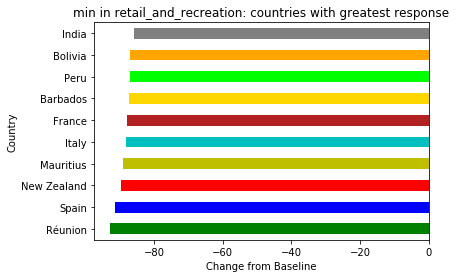

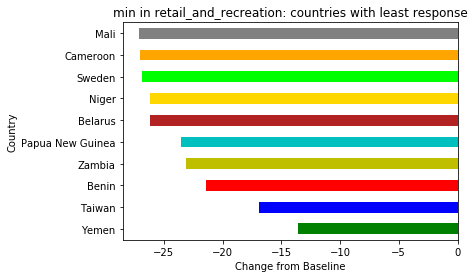

country_region
Réunion            -92.857143
Spain              -91.428571
New Zealand        -89.571429
Mauritius          -89.000000
Italy              -88.142857
                      ...    
Papua New Guinea   -23.571429
Zambia             -23.142857
Benin              -21.428571
Taiwan             -16.857143
Yemen              -13.571429
Name: retail_and_recreation_percent_change_from_baseline, Length: 132, dtype: float64

In [102]:
# retail and reacreation
sort_and_plot('retail_and_recreation_percent_change_from_baseline', df=min_week_df)

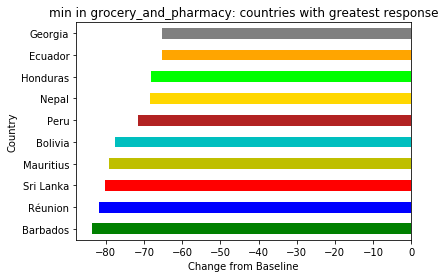

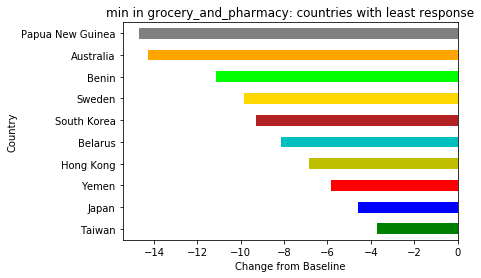

country_region
Barbados    -83.571429
Réunion     -81.857143
Sri Lanka   -80.285714
Mauritius   -79.142857
Bolivia     -77.714286
               ...    
Belarus      -8.142857
Hong Kong    -6.857143
Yemen        -5.857143
Japan        -4.571429
Taiwan       -3.714286
Name: grocery_and_pharmacy_percent_change_from_baseline, Length: 132, dtype: float64

In [103]:
# grocery and pharamcy
sort_and_plot('grocery_and_pharmacy_percent_change_from_baseline', df=min_week_df)

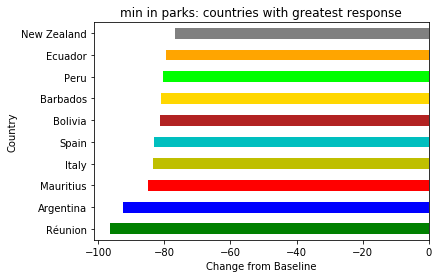

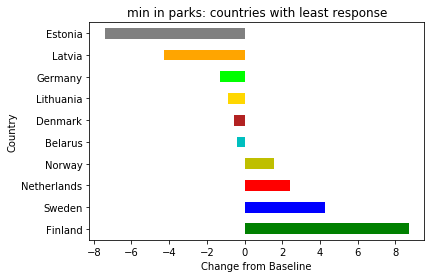

country_region
Réunion         -96.500000
Argentina       -92.571429
Mauritius       -84.857143
Italy           -83.571429
Spain           -83.142857
                   ...    
Norway            1.571429
Netherlands       2.428571
Sweden            4.285714
Finland           8.714286
Liechtenstein          NaN
Name: parks_percent_change_from_baseline, Length: 132, dtype: float64

In [104]:
# parks
sort_and_plot('parks_percent_change_from_baseline', df=min_week_df)

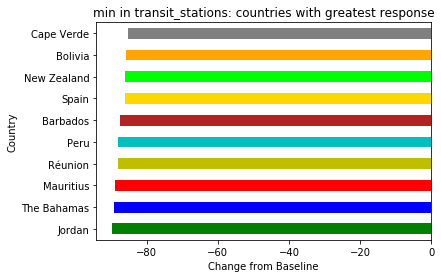

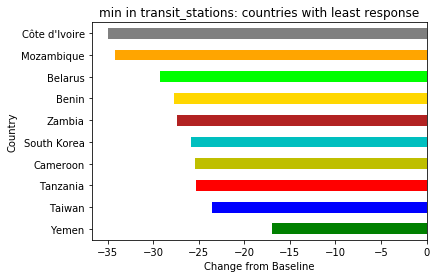

country_region
Jordan          -89.714286
The Bahamas     -89.285714
Mauritius       -88.857143
Réunion         -88.142857
Peru            -88.142857
                   ...    
Cameroon        -25.428571
Tanzania        -25.285714
Taiwan          -23.571429
Yemen           -17.000000
Guinea-Bissau          NaN
Name: transit_stations_percent_change_from_baseline, Length: 132, dtype: float64

In [105]:
# transit stations
sort_and_plot('transit_stations_percent_change_from_baseline', df=min_week_df)

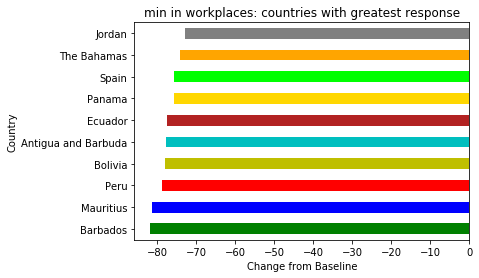

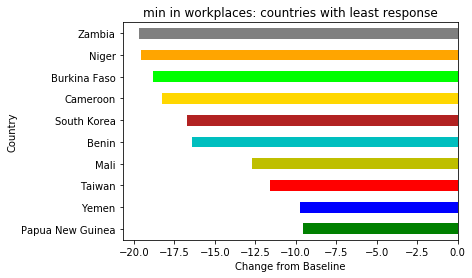

country_region
Barbados              -81.714286
Mauritius             -81.428571
Peru                  -78.714286
Bolivia               -78.000000
Antigua and Barbuda   -77.714286
                         ...    
Benin                 -16.428571
Mali                  -12.714286
Taiwan                -11.571429
Yemen                  -9.750000
Papua New Guinea       -9.571429
Name: workplaces_percent_change_from_baseline, Length: 132, dtype: float64

In [106]:
# workplaces
sort_and_plot('workplaces_percent_change_from_baseline', df=min_week_df)

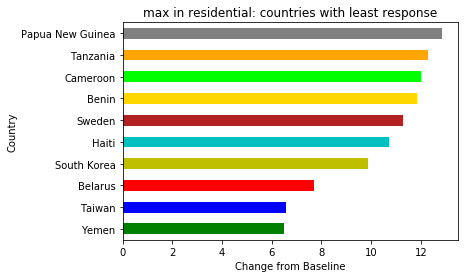

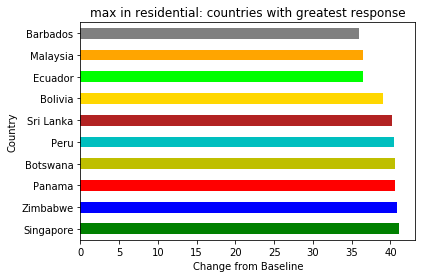

country_region
Yemen             6.500000
Taiwan            6.571429
Belarus           7.714286
South Korea       9.857143
Haiti            10.714286
                   ...    
Zimbabwe         40.857143
Singapore        41.142857
Guinea-Bissau          NaN
Liechtenstein          NaN
Réunion                NaN
Name: residential_percent_change_from_baseline, Length: 132, dtype: float64

In [107]:
# for resedential it is different because people will spend more time at home. for that reason max() is used

# residential
sort_and_plot('residential_percent_change_from_baseline', op='max', df=min_week_df)

#### Correlate the number of corona cases with changes in mobility

In [108]:
# pearson correlation
mobil_df_new.corrwith(mobil_df_new.corona_cases, method='pearson')

retail_and_recreation_percent_change_from_baseline   -0.115086
grocery_and_pharmacy_percent_change_from_baseline    -0.047482
parks_percent_change_from_baseline                   -0.026460
transit_stations_percent_change_from_baseline        -0.114324
workplaces_percent_change_from_baseline              -0.130336
residential_percent_change_from_baseline              0.103888
corona_cases                                          1.000000
dtype: float64

In [109]:
# kendall correlation
mobil_df_new.corrwith(mobil_df_new.corona_cases, method='kendall')

retail_and_recreation_percent_change_from_baseline   -0.523007
grocery_and_pharmacy_percent_change_from_baseline    -0.358602
parks_percent_change_from_baseline                   -0.310559
transit_stations_percent_change_from_baseline        -0.502600
workplaces_percent_change_from_baseline              -0.496179
residential_percent_change_from_baseline              0.504657
corona_cases                                          1.000000
dtype: float64

In [110]:
# spearman correlation
mobil_df_new.corrwith(mobil_df_new.corona_cases, method='spearman')

retail_and_recreation_percent_change_from_baseline   -0.724070
grocery_and_pharmacy_percent_change_from_baseline    -0.533417
parks_percent_change_from_baseline                   -0.415453
transit_stations_percent_change_from_baseline        -0.704580
workplaces_percent_change_from_baseline              -0.692679
residential_percent_change_from_baseline              0.698243
corona_cases                                          1.000000
dtype: float64

In [111]:
'''As demonstrated by the correlations, cases are least correlated with parks and grocery_and_pharmacy location types,
   which makes sense because grocery_and_pharmacy are essentials.'''

'As demonstrated by the correlations, cases are least correlated with parks and grocery_and_pharmacy location types,\n   which makes sense because grocery_and_pharmacy are essentials.'

### Justification

**As shown by the results above, most countries reacted to the pandemic during late March-April. The results also show
That countries neighboring China, European and South American countries had the earliest drop in mobility.**

**As for countries/regions that had the most mobility drop, Reunion, Mauritius, The Bahamas, and Barbados islands
are among the first. This might be due to tourists not visiting, especially that the data is from January,
which might be a season to visit these islands. Jordan had the greatest drop in transit stations.
This could be due to government enforcing a certain policy with regards to transit
stations.**

**Besides the islands: Spain, Italy, New Zealand, Srilanka, Bolivia, Peru, Argentina, and Jordan are the countries with
greatest drop in mobility.**

**The results indicate that islands with high tourism and countries in Europe and South America had the greatest drop in 
mobility. However, similar to Asia, European countries had a wide range of responses. Thus, the results also indicate
that on average, North American countries experienced a greater drop in mobility.**

**As for correlation between cases and change in mobility, cases are least correlated with parks and grocery_and_pharmacy location types,
which makes sense because grocery_and_pharmacy are essentials. As for parks, the data cannot be relied upon too much because the baseline is taken from January, which means it's too cold many countries to go to the park. This explains why Scandinavian countries actually witnessed an increase in park visits rather than a decrease**

**Explained earlier, the method of taking min day has several problems. The change in mobility could be due to a holiday or any other type of event that could cause a population to behave differently. As a way of preventing this, a 7-day average is taken. This doesn't completely end the problem, but it is a better way of analyzing mobility during the pandemic. To give an example, in the first method, Luxembourg was among the countries with greatest drop in workplaces. However, when looking more closely at the date in which it achieved a min, it was Easter Monday, which is a national holiday and the cause of a greater drop. Nonetheless, when taking a 7-day average Luxembourg is no longer among the countries with greatest drop in workplaces. The 7-day average is not a complete solution of the problem posed by this project, but it still yields interesting insights and mostly accurate results** 

## Conclusion

### Reflection

**The objective of this project is to find out how mobility was affected during the pandemic. Specifically, the aim is to observe the point where each country experienced least mobility. Mobility is also analyzed continent-wise. another aim of the project is to show whether there is a correlation between coronavirus cases and mobility**

**To accomplish objectives above, two datasets are utilized, the first dataset (and principal one) looks at each country's change in mobility from an established baseline. Google Map is used to compute the baseline and find change for each day by measuring the time an indivisual spends at a certain location. The second dataset is a table of countries as rows and dates as columns, where the entries are the number of coronavirus cases**

**After preprocessing the data, what remains is implementing methods to extract insights from the data to answer the questions posed by the problem. a min is taken for each country to find by what percentage and when a country experienced the greatest mobility drop. As an improvement of this method, a 7-day average is taken and then min is computed to find by what percentage and during which week did the country experience greatest mobility drop**

**As for continents, countries are grouped toghether to compute the mean of the greatest drop and mean date**

**As for correlation with coronavirus cases: Pearson, Kendall, and Spearman correlations are used**

**One interesting aspect of the problem is the surprise when looking at the results. I did not expect that islands known for tourism would dominate the table for countries with greatest drop.**

### improvement

**Having a map showing the degree of mobility drop for each country would make for an easier reading of the results. One could take each location type, combine them together and get an average that would indicate degree of mobility. that average is then mapped to the country's geographical location**

**Another improvement is to compute the mean over the whole period for each country. That would give a more general look at how the country's mobility was affected compared to taking min day and min week**